In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prompt_toolkit.key_binding.bindings.named_commands import self_insert
#데이터 증강에 필요한 라이브러리
from scipy.ndimage import median_filter, rotate, shift
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
df = pd.read_pickle("/home/unsi/다운로드/LSWMD.pkl") 
df

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]
...,...,...,...,...,...,...
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]


In [3]:
df['waferMap'][0].shape

(45, 48)

In [4]:
# failureType 열의 데이터 유형과 샘플 값 확인
print(df['failureType'].head(50))  # 상위 50개의 데이터를 확인


0         [[none]]
1         [[none]]
2         [[none]]
3         [[none]]
4         [[none]]
5         [[none]]
6         [[none]]
7         [[none]]
8         [[none]]
9         [[none]]
10        [[none]]
11        [[none]]
12        [[none]]
13        [[none]]
14        [[none]]
15        [[none]]
16        [[none]]
17        [[none]]
18        [[none]]
19         [[Loc]]
20        [[none]]
21        [[none]]
22        [[none]]
23        [[none]]
24        [[none]]
25        [[none]]
26        [[none]]
27        [[none]]
28        [[none]]
29        [[none]]
30        [[none]]
31        [[none]]
32        [[none]]
33        [[none]]
34        [[none]]
35              []
36    [[Edge-Loc]]
37    [[Edge-Loc]]
38    [[Edge-Loc]]
39    [[Edge-Loc]]
40         [[Loc]]
41    [[Edge-Loc]]
42    [[Edge-Loc]]
43    [[Edge-Loc]]
44      [[Center]]
45              []
46        [[none]]
47         [[Loc]]
48    [[Edge-Loc]]
49      [[Center]]
Name: failureType, dtype: object


In [5]:
import numpy as np

# class2idx 딕셔너리 (예시)
class2idx = {
    'Loc': 0,
    'Edge-Loc': 1,
    'Center': 2,
    'Edge-Ring': 3,
    'Scratch': 4,
    'Random': 5,
    'Near-full': 6,
    'Donut': 7
}

def map_failure_type(failure_list):
    # numpy array를 리스트로 변환
    if isinstance(failure_list, np.ndarray):
        failure_list = failure_list.tolist()

    # 문자열로 변환
    failure_str = str(failure_list)

    # 'none' 또는 None 문자열 처리
    if "none" in failure_str or failure_list == []:
        return 8

    # 리스트 안에 첫 번째 원소를 가져오기
    try:
        first_element = eval(failure_str)[0][0]  # 첫 번째 리스트의 첫 번째 요소
        return class2idx.get(first_element, 8)
    except (IndexError, SyntaxError):
        return 8

# apply로 처리
df['failureType'] = df['failureType'].apply(map_failure_type)

# 결과 확인
print(df['failureType'])

0         8
1         8
2         8
3         8
4         8
         ..
811452    3
811453    1
811454    3
811455    8
811456    8
Name: failureType, Length: 811457, dtype: int64


In [6]:
df['waferMap'][0].shape

(45, 48)

In [7]:
df.info()
df[df['failureType'] != 8]
df = df[df['waferMap'].apply(lambda x: x.shape == (39, 37))]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 37.1+ MB


In [8]:
df

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
67656,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1129.0,lot5129,1.0,[],8
67657,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1129.0,lot5129,2.0,[],8
67658,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1129.0,lot5129,3.0,[],8
67659,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1129.0,lot5129,4.0,[],8
67660,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1129.0,lot5129,5.0,[],8
...,...,...,...,...,...,...
763742,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...",1109.0,lot45599,23.0,[[Test]],8
763743,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...",1109.0,lot45599,24.0,[[Test]],8
763744,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...",1109.0,lot45599,25.0,[[Test]],8
763745,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...",1109.0,lot45600,1.0,[],8


In [9]:
# failureType의 고유 값과 개수 세기
failure_counts = df['failureType'].value_counts()

print(failure_counts)

failureType
8    14312
1      473
0      222
2      173
4       60
5       35
7       22
3       15
6       15
Name: count, dtype: int64


In [10]:
features = df['waferMap'].values
targets = df['failureType'].values

In [11]:
features.shape

(15327,)

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# 결함 유형 8을 새로운 라벨 7로 변환 (필요할 경우)


# 데이터 분할 (train, test split)
X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets, random_state=123, test_size=0.2)

print(f"훈련 데이터 수: {X_train.shape[0]}, 테스트 데이터 수: {X_test.shape[0]}")

훈련 데이터 수: 12261, 테스트 데이터 수: 3066


In [13]:
from scipy.ndimage import median_filter
import ast

# 필터링 함수 정의
def apply_median_filter_to_features(features, targets):
    filtered_maps = []
    filtered_targets = []

    for wafer_map, target in zip(features, targets):
        # 문자열이 아닌 ndarray인 경우 처리
        if isinstance(wafer_map, np.ndarray):
            wafer_map_array = wafer_map
        else:
            wafer_map_array = np.array(ast.literal_eval(wafer_map.replace(' ', ',')))

        # 필터 적용: 0은 그대로 두고 1과 2에 대해 필터링 적용
        filtered_map = np.where(wafer_map_array == 0, 0, median_filter(wafer_map_array, size=3))
        filtered_maps.append(filtered_map)
        filtered_targets.append(target)

    return np.array(filtered_maps), np.array(filtered_targets)

In [14]:
# 필터링된 훈련 데이터
filtered_train_X, filtered_train_y = apply_median_filter_to_features(X_train, y_train)
filtered_test_X, filtered_test_Y = apply_median_filter_to_features(X_test, y_test)
print(f"필터링된 훈련 데이터의 형태: {filtered_train_X.shape}")

필터링된 훈련 데이터의 형태: (12261, 39, 37)


In [15]:
X_test.shape, y_test.shape

((3066,), (3066,))

In [16]:
import numpy as np

# X_test의 요소들을 numpy 배열로 변환
X_test_images = np.array(X_test.tolist())  # 리스트로 변환 후 numpy 배열로 변환

# 배열의 형태 확인
print(f"X_test_images shape: {X_test_images.shape}")  # (n_samples, 26, 26)

# reshape을 사용하여 (n_samples, 26*26) 형태로 변환
X_test_reshaped = X_test_images.reshape(-1, 39*37)  # (n_samples, 676)

X_test = X_test_reshaped

# 변환된 형태 출력
print(f"X_test shape: {X_test_reshaped.shape}")  # (n_samples, 676)

X_test_images shape: (3066, 39, 37)
X_test shape: (3066, 1443)


In [17]:
X_test.shape, y_test.shape

((3066, 1443), (3066,))

In [18]:
X_train_no_aug = filtered_train_X
y_train_no_aug = filtered_train_y

In [19]:
X_train_no_aug.shape

(12261, 39, 37)

In [20]:
import numpy as np

# 데이터 증강 함수 (Train 데이터만 증강)
def augment_data(wafer_maps, targets):
    augmented_maps = []
    augmented_targets = []
    
    # 원본 웨이퍼 맵의 크기 확인 (첫 번째 맵을 기준으로)
    original_shape = wafer_maps[0].shape

    for wafer_map, target in zip(wafer_maps, targets):
        # 원본 데이터 추가 (리사이즈 없이 그대로)
        augmented_maps.append(wafer_map)
        augmented_targets.append(target)

        # 결함 있는 웨이퍼만 증강 (라벨 8 제외)
        if target != 8:
            # 90도 회전
            rotated_90 = np.rot90(wafer_map, k=-1)
            rotated_180 = np.rot90(wafer_map, k=2)
            rotated_270 = np.rot90(wafer_map, k=1)

            # 상하 및 좌우 뒤집기
            flipped_vertical = np.flip(wafer_map, axis=0)
            flipped_horizontal = np.flip(wafer_map, axis=1)

            # 회전 및 뒤집기 후 동일한 크기 유지 확인 및 강제 조정
            augmented_maps.append(pad_or_crop(rotated_90, original_shape))
            augmented_targets.append(target)

            augmented_maps.append(pad_or_crop(rotated_180, original_shape))
            augmented_targets.append(target)

            augmented_maps.append(pad_or_crop(rotated_270, original_shape))
            augmented_targets.append(target)

            augmented_maps.append(pad_or_crop(flipped_vertical, original_shape))
            augmented_targets.append(target)

            augmented_maps.append(pad_or_crop(flipped_horizontal, original_shape))
            augmented_targets.append(target)

    # 웨이퍼 맵의 모양이 모두 같은지 확인 및 배열화
    augmented_maps = np.array(augmented_maps)
    
    return augmented_maps, np.array(augmented_targets)

def pad_or_crop(image, target_shape):
    """
    이미지의 크기가 target_shape와 동일하지 않은 경우, 잘라내거나 패딩을 추가하여 동일한 크기로 만듭니다.
    """
    current_shape = image.shape
    padded_image = np.zeros(target_shape, dtype=image.dtype)

    # 이미지의 크기가 목표 크기보다 작다면, 중앙에 위치하도록 패딩
    padded_image[:min(current_shape[0], target_shape[0]), :min(current_shape[1], target_shape[1])] = \
        image[:min(current_shape[0], target_shape[0]), :min(current_shape[1], target_shape[1])]

    return padded_image

# 증강된 훈련 데이터
X_train_aug, y_train_aug = augment_data(X_train_no_aug, y_train_no_aug)

print(f"증강된 훈련 데이터의 형태: {X_train_aug.shape}")


증강된 훈련 데이터의 형태: (16321, 39, 37)


In [21]:
import numpy as np

# 로그 변환을 적용하여 0으로 인한 문제를 피하기 위해 np.log1p 사용 (log(1 + x))
X_train_no_aug = np.array([np.log1p(i) for i in X_train_no_aug])
X_test = np.array([np.log1p(i) for i in X_test])
X_train_aug = np.array([np.log1p(i) for i in X_train_aug])
# 결과 출력
print(X_train_aug[0])
print(X_train_no_aug[0])



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [22]:
print(X_train_aug.shape)

(16321, 39, 37)


In [23]:
import pandas as pd

# 결함 유형별 데이터 개수 세기
augmented_target_series = pd.Series(y_train_aug)
failure_counts_augmented = augmented_target_series.value_counts()

print("증강된 훈련 데이터의 결함 유형별 개수:")
print(failure_counts_augmented)

증강된 훈련 데이터의 결함 유형별 개수:
8    11449
1     2268
0     1068
2      828
4      288
5      168
7      108
3       72
6       72
Name: count, dtype: int64


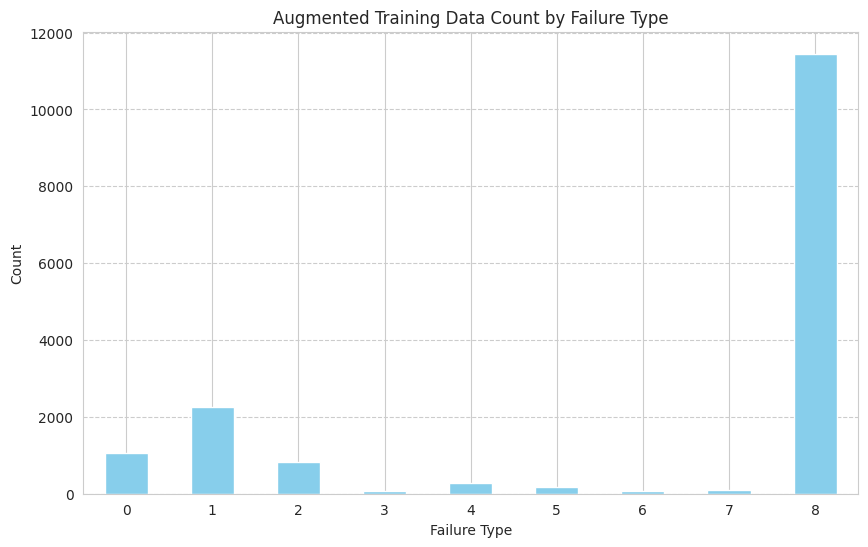

In [24]:
import matplotlib.pyplot as plt

# 결함 유형별 데이터 개수 그래프 그리기
plt.figure(figsize=(10, 6))
failure_counts_augmented.sort_index().plot(kind='bar', color='skyblue')
plt.title('Augmented Training Data Count by Failure Type')
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

In [25]:
import numpy as np
import pandas as pd

# 특징 추출 함수
def extract_features(wafer_maps):
    features = []
    
    for wafer_map in wafer_maps:
        # 1. 결함 다이 비율
        total_pixels = wafer_map.size  # 전체 다이 개수
        defect_count = np.sum(wafer_map == 2)  # 2의 개수
        defect_ratio = defect_count / total_pixels if total_pixels > 0 else 0

        # 2. 결함 분포 (중앙값과 가장자리 근처에 집중되는지)
        defect_indices = np.argwhere(wafer_map == 2)  # 결함 위치의 인덱스
        if defect_indices.size > 0:
            center_of_defects = np.mean(defect_indices, axis=0)  # 결함 위치의 중앙
            distance_to_center = np.linalg.norm(defect_indices - center_of_defects, axis=1)  # 중앙에서의 거리
            avg_distance = np.mean(distance_to_center)  # 평균 거리
        else:
            center_of_defects = np.array([np.nan, np.nan])
            avg_distance = np.nan

        # 3. 픽셀 기반 통계 값 (평균 및 분산)
        mean_value = np.mean(wafer_map)
        variance_value = np.var(wafer_map)

        # 특징 추가
        features.append({
            'defect_ratio': defect_ratio,
            'center_of_defects': center_of_defects,
            'avg_distance_to_center': avg_distance,
            'mean_value': mean_value,
            'variance_value': variance_value
        })

    return pd.DataFrame(features)

# 특징 추출
features_df = extract_features(X_train_aug)

# 결과 확인
print(features_df.head())

   defect_ratio center_of_defects  avg_distance_to_center  mean_value  \
0           0.0        [nan, nan]                     NaN    0.536621   
1           0.0        [nan, nan]                     NaN    0.545898   
2           0.0        [nan, nan]                     NaN    0.536621   
3           0.0        [nan, nan]                     NaN    0.542480   
4           0.0        [nan, nan]                     NaN    0.544434   

   variance_value  
0        0.088318  
1        0.084778  
2        0.088318  
3        0.082397  
4        0.083618  


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


In [26]:
from imblearn.over_sampling import ADASYN
import numpy as np

# ADASYN을 사용한 데이터 증강
def augment_data_with_adasyn(X, y):
    ada = ADASYN(sampling_strategy='auto', random_state=123)
    
    # X를 2D 형태로 변환 (n_samples, 676)
    X_flattened = X.reshape(X.shape[0], -1)
    
    # ADASYN을 적용하여 데이터 증강
    X_resampled, y_resampled = ada.fit_resample(X_flattened, y)
    
    # 1D 형태로 반환 (X_resampled의 shape은 (n_samples, 676))
    return X_resampled, y_resampled

# ADASYN을 사용하여 증강된 훈련 데이터 생성
X_train_aug_with_adsyn, y_train_aug_with_adsyn = augment_data_with_adasyn(X_train_aug, y_train_aug)

print(f"ADASYN으로 증강된 훈련 데이터의 형태: {X_train_aug_with_adsyn.shape}")

ADASYN으로 증강된 훈련 데이터의 형태: (102820, 1443)


In [27]:
X_train_aug_with_adsyn.shape

(102820, 1443)

In [28]:
X_train_aug = X_train_aug.reshape(-1, 39*37)


In [29]:
X_train_aug.shape

(16321, 1443)

In [30]:
X_train_no_aug = X_train_no_aug.reshape(-1, 39*37)


In [31]:
assert len(X_train_no_aug.shape) == len(X_train_aug.shape) == len(X_train_aug_with_adsyn.shape)


In [32]:
import numpy as np

def extract_statistics(arr):
    # 배열의 크기 확인
    n_rows, n_cols = arr.shape
    
    # 각 행을 8개 구간으로 나누기 위해 구간의 크기 계산
    n_splits = 8
    segment_size = n_cols // n_splits
    
    # 결과를 저장할 배열 초기화 (n_rows, 32)
    result = np.zeros((n_rows, n_splits * 4))
    
    # 각 행에 대해 반복
    for i in range(n_rows):
        row = arr[i]
        features = []
        
        # 각 구간에 대해 통계 값 계산
        for j in range(n_splits):
            segment = row[j * segment_size:(j + 1) * segment_size]
            mean = np.mean(segment)
            std = np.std(segment)
            var = np.var(segment)
            summation = np.sum(segment)
            
            features.extend([mean, std, var, summation])
        
        # 결과 배열에 통계 값 저장
        result[i] = features
    
    return result

# 사용 예시
# 임의의 (13885, 1443) 크기의 배열 생성
arr = np.random.rand(13885, 1443)
output = extract_statistics(arr)
print(output.shape)  # (13885, 32)


(13885, 32)


In [33]:
import numpy as np

class FeatureExtraction:
    def __init__(self):
        pass
    
    def __call__(self, arr):
        return self.forward(arr)
    
    def forward(self, arr):
        n_rows, n_cols = arr.shape
        n_splits = 8  # 구간 개수
        stride = 4  # 겹치는 간격 설정

        # 각 구간에 대해 추출할 통계 수치의 개수 (기존 4개에서 IQR, min, max 추가로 7개로 변경)
        num_features = 7
        # 결과를 저장할 배열 초기화 (n_rows, 8 * num_features)
        result = np.zeros((n_rows, n_splits * num_features))
        
        # 각 행에 대해 반복
        for i in range(n_rows):
            row = arr[i]
            features = []
            
            # 각 구간에 대해 통계 값 계산
            for j in range(n_splits):
                start = j * stride
                end = start + (n_cols // n_splits)
                
                # 구간이 배열의 경계를 넘지 않도록 보정
                if end > n_cols:
                    end = n_cols
                
                segment = row[start:end]
                
                # 기본 통계 값 계산
                mean = np.mean(segment)
                std = np.std(segment)
                var = np.var(segment)
                summation = np.sum(segment)
                
                # 추가 통계 값 계산
                iqr = np.percentile(segment, 75) - np.percentile(segment, 25)
                minimum = np.min(segment)
                maximum = np.max(segment)
                
                # 모든 통계 값 추가
                features.extend([mean, std, var, summation, iqr, minimum, maximum])
            
            # 결과 배열에 통계 값 저장
            result[i] = features
        
        return result



In [34]:
extracter = FeatureExtraction()
X_train_no_aug = extracter.forward(X_train_no_aug)
X_train_aug = extracter.forward(X_train_aug)
X_train_aug_with_adsyn = extracter.forward(X_train_aug_with_adsyn)
X_test = extracter.forward(X_test)

In [35]:
y_train_aug

array([8, 8, 8, ..., 8, 8, 8])

In [36]:
assert X_train_no_aug.shape[-1] == X_train_aug.shape[-1] == X_train_aug_with_adsyn.shape[-1]

In [37]:
from sklearn.metrics import classification_report, balanced_accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb

# 공통된 평가 함수 정의
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # 모델 훈련
    model.fit(X_train, y_train)
    
    # 검증 데이터로 예측
    y_pred = model.predict(X_test)
    
    # 성능 지표 계산
    accuracy = model.score(X_test, y_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    
    # 결과 출력
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Balanced Accuracy Score: {balanced_acc:.4f}")
    
    # classification_report 출력 (average 파라미터 제거)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# XGBoost 모델 정의
def create_model():
    return xgb.XGBClassifier(objective='multi:softmax', num_class=8, eval_metric='mlogloss', use_label_encoder=False, device='cuda')

# 모델 및 데이터셋 평가
datasets = [
    ("No Augmentation", X_train_no_aug, y_train_no_aug),
    ("Augmentation", X_train_aug, y_train_aug),
    ("Augmentation with ADASYN", X_train_aug_with_adsyn, y_train_aug_with_adsyn)
]

# 공통된 테스트 데이터 (X_test, y_test)로 각 모델 평가
for dataset_name, X_train, y_train in datasets:
    print(f"\nEvaluating model trained on {dataset_name} dataset")
    model = create_model()
    evaluate_model(model, X_train, y_train, X_test, y_test)



Evaluating model trained on No Augmentation dataset


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:21:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:21:03] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:21:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encode

Accuracy: 0.6582
Precision: 0.8857
Recall: 0.6582
F1 Score: 0.7495
Balanced Accuracy Score: 0.2031

Classification Report:
               precision    recall  f1-score   support

           0       0.02      0.18      0.04        44
           1       0.07      0.34      0.12        95
           2       0.00      0.00      0.00        35
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        12
           5       0.02      0.29      0.04         7
           6       0.25      0.33      0.29         3
           7       0.00      0.00      0.00         4
           8       0.95      0.69      0.80      2863

    accuracy                           0.66      3066
   macro avg       0.15      0.20      0.14      3066
weighted avg       0.89      0.66      0.75      3066


Evaluating model trained on Augmentation dataset
Accuracy: 0.5757
Precision: 0.8907
Recall: 0.5757
F1 Score: 0.6910
Balanced Accuracy Score: 0.2348

Classification Report

/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:21:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.4191
Precision: 0.8939
Recall: 0.4191
F1 Score: 0.5625
Balanced Accuracy Score: 0.2069

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.05      0.01        44
           1       0.04      0.28      0.07        95
           2       0.00      0.00      0.00        35
           3       0.03      0.33      0.05         3
           4       0.00      0.00      0.00        12
           5       0.01      0.43      0.01         7
           6       0.20      0.33      0.25         3
           7       0.00      0.00      0.00         4
           8       0.96      0.44      0.60      2863

    accuracy                           0.42      3066
   macro avg       0.14      0.21      0.11      3066
weighted avg       0.89      0.42      0.56      3066



/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [38]:
y_train_no_aug.shape

(12261,)

In [39]:
X_train_aug

array([[0.32641602, 0.35668945, 0.12719727, ..., 0.69335938, 0.        ,
        1.09863281],
       [0.31103516, 0.35546875, 0.12634277, ..., 0.69335938, 0.        ,
        1.09863281],
       [0.32202148, 0.34936523, 0.12207031, ..., 0.69335938, 0.        ,
        0.69335938],
       ...,
       [0.32421875, 0.35302734, 0.12457275, ..., 0.69335938, 0.        ,
        0.69335938],
       [0.32202148, 0.34936523, 0.12207031, ..., 0.69335938, 0.        ,
        1.09863281],
       [0.30419922, 0.34399414, 0.1184082 , ..., 0.69335938, 0.        ,
        0.69335938]])

In [40]:
X_train_aug_with_adsyn

array([[0.32641602, 0.35668945, 0.12719727, ..., 0.69335938, 0.        ,
        1.09863281],
       [0.31103516, 0.35546875, 0.12634277, ..., 0.69335938, 0.        ,
        1.09863281],
       [0.32202148, 0.34936523, 0.12207031, ..., 0.69335938, 0.        ,
        0.69335938],
       ...,
       [0.30810547, 0.34545898, 0.11938477, ..., 0.69335938, 0.        ,
        0.86181641],
       [0.3046875 , 0.34375   , 0.1182251 , ..., 0.69335938, 0.        ,
        0.71582031],
       [0.30419922, 0.34204102, 0.11700439, ..., 0.69335938, 0.        ,
        0.69335938]])

In [41]:
from bayes_opt import BayesianOptimization
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 평가 함수 정의
def xgb_evaluate(learning_rate, n_estimators, max_depth, subsample, colsample_bytree):
    # XGBoost 모델 정의
    model = xgb.XGBClassifier(
        learning_rate=learning_rate,
        n_estimators=int(n_estimators),  # 정수로 변환
        max_depth=int(max_depth),  # 정수로 변환
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        objective='multi:softmax',
        num_class=8,
        eval_metric='mlogloss',
        use_label_encoder=False,
        device='cuda'
    )
    
    # 교차 검증 데이터로 모델 평가
    model.fit(X_train_aug_with_adsyn, y_train_aug_with_adsyn)
    y_pred = model.predict(X_test)
    accuracy = balanced_accuracy_score(y_test, y_pred)
    
    return accuracy

# 최적화할 파라미터 범위 설정
param_bounds = {
    'learning_rate': (0.01, 0.3),
    'n_estimators': (50, 500),
    'max_depth': (3, 10),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0)
}

# BayesianOptimization 객체 생성
optimizer = BayesianOptimization(f=xgb_evaluate, pbounds=param_bounds, random_state=42)

# 최적화 수행
optimizer.maximize(init_points=5, n_iter=25)

# 최적화 결과 출력
print(optimizer.max)


|   iter    |  target   | colsam... | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:21:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 1         | 0.2319    | 0.7498    | 0.2857    | 8.124     | 319.4     | 0.6624    |


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:21:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 2         | 0.2022    | 0.6624    | 0.02684   | 9.063     | 320.5     | 0.8832    |


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:21:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 3         | 0.2093    | 0.6082    | 0.2913    | 8.827     | 145.6     | 0.6727    |


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:21:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 4         | 0.2384    | 0.6734    | 0.09823   | 6.673     | 244.4     | 0.7165    |


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:21:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 5         | 0.1675    | 0.8447    | 0.05045   | 5.045     | 214.9     | 0.7824    |


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:21:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 6         | 0.2253    | 0.8495    | 0.2534    | 8.314     | 319.4     | 0.9844    |


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:21:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 7         | 0.2155    | 0.6       | 0.3       | 6.466     | 318.0     | 0.6       |


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:21:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 8         | 0.2106    | 0.8214    | 0.2932    | 7.74      | 243.0     | 0.6297    |


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:21:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 9         | 0.137     | 0.6       | 0.01      | 5.834     | 245.5     | 0.7848    |


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:21:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 10        | 0.1777    | 0.6       | 0.01      | 7.13      | 243.9     | 0.7311    |


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:21:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 11        | 0.2253    | 0.8809    | 0.1037    | 6.494     | 317.9     | 0.7193    |


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:21:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 12        | 0.2194    | 0.9066    | 0.3       | 6.393     | 244.4     | 0.6215    |


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:22:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 13        | 0.2264    | 0.8032    | 0.1777    | 7.634     | 243.1     | 0.802     |


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:22:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 14        | 0.2107    | 0.6       | 0.2954    | 6.774     | 244.7     | 0.879     |


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:22:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 15        | 0.2179    | 0.6299    | 0.2438    | 8.073     | 340.1     | 0.7421    |


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:22:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 16        | 0.2132    | 0.9769    | 0.2476    | 3.931     | 303.8     | 0.6537    |


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:22:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 17        | 0.1397    | 0.6       | 0.01      | 6.373     | 244.3     | 0.9201    |


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:22:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 18        | 0.212     | 0.9716    | 0.2088    | 6.297     | 483.9     | 0.975     |


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:22:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 19        | 0.2286    | 0.7054    | 0.2352    | 7.632     | 243.1     | 0.7277    |


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:22:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 20        | 0.2209    | 0.782     | 0.2056    | 6.72      | 244.4     | 0.6       |


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:22:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 21        | 0.2094    | 0.956     | 0.02978   | 5.955     | 424.5     | 0.7402    |


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:22:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 22        | 0.1391    | 0.6       | 0.01      | 6.821     | 244.5     | 0.6648    |


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:22:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 23        | 0.1879    | 0.7818    | 0.2917    | 3.827     | 105.3     | 0.687     |


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:22:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 24        | 0.2299    | 0.6794    | 0.104     | 6.679     | 244.4     | 0.7225    |


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:22:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 25        | 0.2228    | 0.9671    | 0.1219    | 7.632     | 178.8     | 0.6621    |


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:22:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 26        | 0.2202    | 0.7489    | 0.1263    | 9.43      | 378.3     | 0.6488    |


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:22:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 27        | 0.198     | 0.6615    | 0.08996   | 6.625     | 244.3     | 0.6851    |


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:23:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 28        | 0.2152    | 0.7545    | 0.2947    | 6.352     | 244.4     | 0.8256    |


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:23:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 29        | 0.2245    | 0.816     | 0.2258    | 4.264     | 394.2     | 0.7215    |


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:23:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 30        | 0.2055    | 0.603     | 0.04922   | 7.806     | 451.3     | 0.7005    |
{'target': np.float64(0.23842335952746455), 'params': {'colsample_bytree': np.float64(0.6733618039413735), 'learning_rate': np.float64(0.09823025045826593), 'max_depth': np.float64(6.673295021425664), 'n_estimators': np.float64(244.3752583889521), 'subsample': np.float64(0.7164916560792167)}}


In [42]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

# 최적의 하이퍼파라미터를 사용한 최종 테스트 함수
def final_test_with_best_params(optimizer, X_train, y_train, X_test, y_test):
    # 베이지안 최적화로 얻은 최적의 하이퍼파라미터 추출
    best_params = optimizer.max['params']
    
    # 최적의 하이퍼파라미터로 XGBoost 모델 학습
    model = xgb.XGBClassifier(
        learning_rate=best_params['learning_rate'],
        n_estimators=int(best_params['n_estimators']),  # 정수로 변환
        max_depth=int(best_params['max_depth']),  # 정수로 변환
        subsample=best_params['subsample'],
        colsample_bytree=best_params['colsample_bytree'],
        objective='multi:softmax',
        num_class=8,
        eval_metric='mlogloss',
        use_label_encoder=False,
        device='cuda'
    )
    
    # 최적 하이퍼파라미터로 모델 학습
    model.fit(X_train, y_train)
    
    # 테스트 데이터로 예측
    y_pred = model.predict(X_test)
    
    # 성능 지표 계산
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    
    # 결과 출력
    print(f"Final Model Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Balanced Accuracy Score: {balanced_acc:.4f}")
    
    # Classification Report 출력
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 최종 테스트 실행
final_test_with_best_params(optimizer, X_train_aug_with_adsyn, y_train_aug_with_adsyn, X_test, y_test)


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:23:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Final Model Performance:
Accuracy: 0.4201
Precision: 0.8969
Recall: 0.4201
F1 Score: 0.5617
Balanced Accuracy Score: 0.2384

Classification Report:
               precision    recall  f1-score   support

           0       0.01      0.14      0.02        44
           1       0.05      0.34      0.09        95
           2       0.00      0.00      0.00        35
           3       0.03      0.33      0.05         3
           4       0.00      0.00      0.00        12
           5       0.01      0.57      0.01         7
           6       0.25      0.33      0.29         3
           7       0.00      0.00      0.00         4
           8       0.96      0.43      0.60      2863

    accuracy                           0.42      3066
   macro avg       0.14      0.24      0.12      3066
weighted avg       0.90      0.42      0.56      3066



/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita